
# Machine Learning Internship task

Welcome folks, Thank you for applying for this internship and we are super excited to take this conversation ahead with you.

But before we go ahead, we would like you to go thru a small assessment, which will help us to evaluate you better on technical skills and working styles.


## Task Objective :
* [ ] Perform EDA on the given [data](https://github.com/geniusai-research/interns_task/blob/main/taskdata.csv).
* [ ] Build some new features which makes sense for the learning objective.
* [ ] Train any classifier (can be any model of your choice XGB,DNNs, etc) 
* [ ] Implement SHAP on this model to explain the decisions. (`Bonus points`) 
* [ ] Submit the task by creating a PR request on this [repository](https://github.com/geniusai-research/interns_task/).

## Instructions :
* Perform all the tasks mentioned above.
* Maintain a single **JupyterNotebook** which has all the descriptions and code in it. 
* Notebook needs to be properly structured .
* Code needs to reproducible.

**We will only accept the assignment if its in a single Notebook or else it will be rejected.**

## Important dates
The assignments needs to be completed in 1 week from today. <br>
**Deadline : 28th October**


If you have any issue then feel free to create issue on this [repository](https://github.com/geniusai-research/interns_task/) or reachout to us over the internshala chat.

<hr>

Cheers!!!  <br>
RK 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("taskdata.csv") 

In [3]:
df.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


# Exploratory Data Analysis (EDA)

   * EDA helps us to get a better understanding of the given data
   * Result of a EDA give us a better dataset to train on any model
   * It is an art of extraxting and analyzing the hidden information behind the data

In [4]:
df.shape

(4407, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 17 columns):
user_id                  4407 non-null int64
account_id               4400 non-null float64
max_return_days          4407 non-null int64
average_return_days      4407 non-null float64
customer_since_months    4407 non-null int64
total_revenue            4407 non-null float64
average_revenue          4407 non-null float64
avg_vas_count            4407 non-null float64
avg_used_vas_value       4407 non-null float64
business_type            4407 non-null int64
avg_wallet_bonus         4407 non-null float64
avg_active_ads           4407 non-null float64
avg_new_ads              4407 non-null float64
avg_email_replies        4407 non-null float64
avg_call_replies         4407 non-null float64
avg_sms_replies          4407 non-null float64
target                   4407 non-null int64
dtypes: float64(12), int64(5)
memory usage: 585.4 KB


In [6]:
df.isnull().sum()

user_id                  0
account_id               7
max_return_days          0
average_return_days      0
customer_since_months    0
total_revenue            0
average_revenue          0
avg_vas_count            0
avg_used_vas_value       0
business_type            0
avg_wallet_bonus         0
avg_active_ads           0
avg_new_ads              0
avg_email_replies        0
avg_call_replies         0
avg_sms_replies          0
target                   0
dtype: int64

All the features except "account id"  does not contain any null value ,also it might be not so useful feature so drop it.

In [7]:
df.drop('account_id',axis=1,inplace=True)

In [8]:
df.describe()

,user_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
count,4.407000e+03,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000
mean,4.106655e+09,22.335602,7.171576,9.874064,194.130365,16.942615,3.249388,72.119006,0.497844,338.851046,98.922260,16.812003,25.681004,27.622151,0.162009,0.103245
std,6.794948e+09,43.591246,19.209092,5.169639,1548.361547,128.268824,5.509869,117.019515,1.199725,831.746150,297.692950,68.045904,55.324218,61.069006,0.517693,0.304313
min,4.100390e+05,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.184510e+08,1.000000,1.000000,5.000000,0.000000,0.000000,0.142857,2.727273,0.000000,0.000000,13.500000,2.500000,4.461538,4.384615,0.000000,0.000000
50%,7.296626e+08,2.000000,1.076923,12.000000,0.000000,0.000000,2.000000,45.000000,0.000000,40.000000,40.000000,6.333333,12.266667,12.933333,0.000000,0.000000
75%,7.292936e+09,30.000000,5.666667,14.000000,0.000000,0.000000,4.333333,100.000000,0.000000,327.280000,101.291667,14.250000,28.000000,30.784615,0.153846,0.000000
max,7.356031e+10,354.000000,354.000000,24.000000,43957.172700,3852.727273,156.583333,3357.500000,5.000000,15606.500000,9183.866667,2606.000000,1716.400000,1743.266667,14.636364,1.000000


Above table shows that total revenue and average revenue data is not normally distributed, data points are only present at max. We can elaborate it with the help of boxplot.

In [9]:
import seaborn as sns

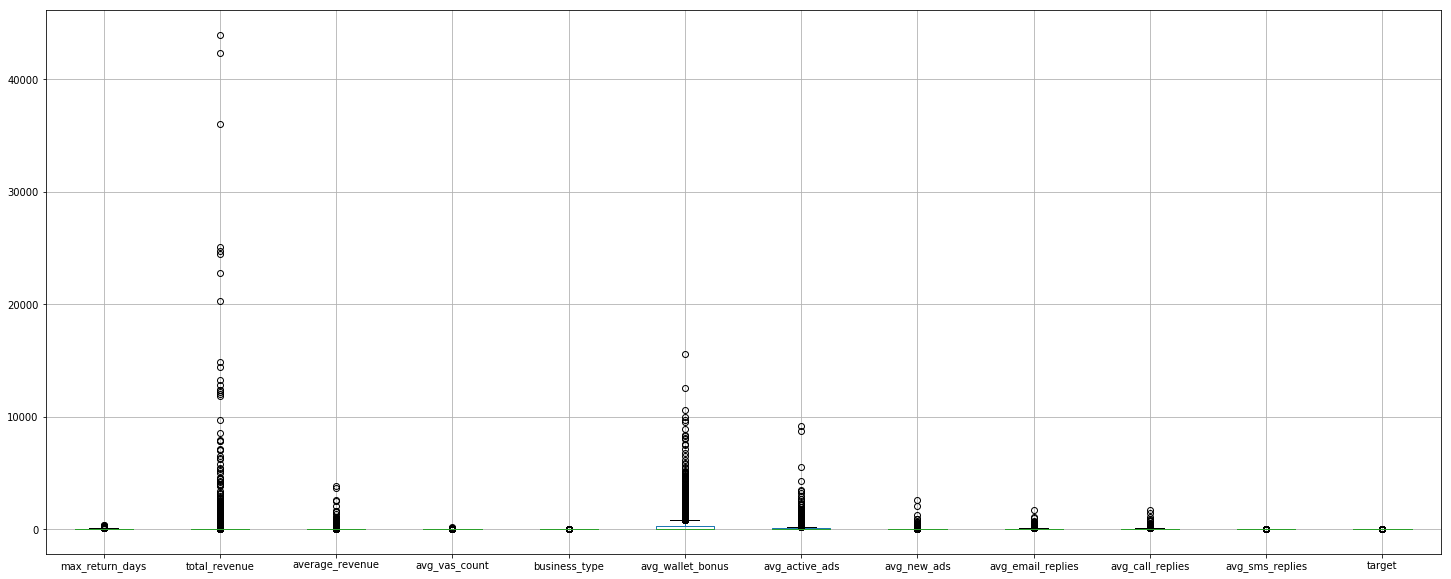

In [10]:
# Exploring outliers using boxplot

df.boxplot(column=['max_return_days',
 'total_revenue',
 'average_revenue',
 'avg_vas_count',
 'business_type',
 'avg_wallet_bonus',
 'avg_active_ads',
 'avg_new_ads',
 'avg_email_replies',
 'avg_call_replies',
 'avg_sms_replies',
 'target'],figsize=(25,10))
plt.show()

#### Above boxplot shows that the total_revenue and avg_wallet_bonus features contains large amount of outliers but sometime removing outlier is not good so i does not remove outliers
* But i write the code in below cell and comment it, if you want to check its impact then uncomment it and run the cell.

In [11]:
# def OutlierDetection(column):
#     sorted(column)
#     Q1,Q3=np.percentile(column,[25,75])
#     IQR = Q3-Q1
#     LowerRange=Q1-(1.5*IQR)
#     UpperRange=Q3+(1.5*IQR)
#     return LowerRange,UpperRange

In [12]:
# def remove_outlier(column):
#     LowerRange,UpperRange=OutlierDetection(column)
#     df.drop(df[(column<LowerRange) | (column > UpperRange)].index,inplace=True)


In [13]:
# remove_outlier(df.total_revenue) 
# remove_outlier(df.avg_wallet_bonus)

In [14]:
df.nunique()

user_id                  4407
max_return_days           229
average_return_days       917
customer_since_months      23
total_revenue             434
average_revenue           510
avg_vas_count             677
avg_used_vas_value       1027
business_type               6
avg_wallet_bonus          989
avg_active_ads           2757
avg_new_ads              1422
avg_email_replies        1900
avg_call_replies         1932
avg_sms_replies           140
target                      2
dtype: int64

In [15]:
data_corr = df.corr()
threshold = 0.5
corr_list = []
cols=df.columns 

In [16]:
for i in range(0,15): 
    for j in range(i+1,15): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

avg_vas_count and avg_used_vas_value = 0.96
avg_email_replies and avg_call_replies = 0.96
total_revenue and average_revenue = 0.95
avg_call_replies and avg_sms_replies = 0.80
max_return_days and average_return_days = 0.75
avg_email_replies and avg_sms_replies = 0.72
avg_active_ads and avg_email_replies = 0.70
avg_active_ads and avg_call_replies = 0.68
avg_active_ads and avg_new_ads = 0.65
total_revenue and avg_used_vas_value = 0.64
average_revenue and avg_used_vas_value = 0.61
total_revenue and avg_vas_count = 0.61
average_revenue and avg_vas_count = 0.59


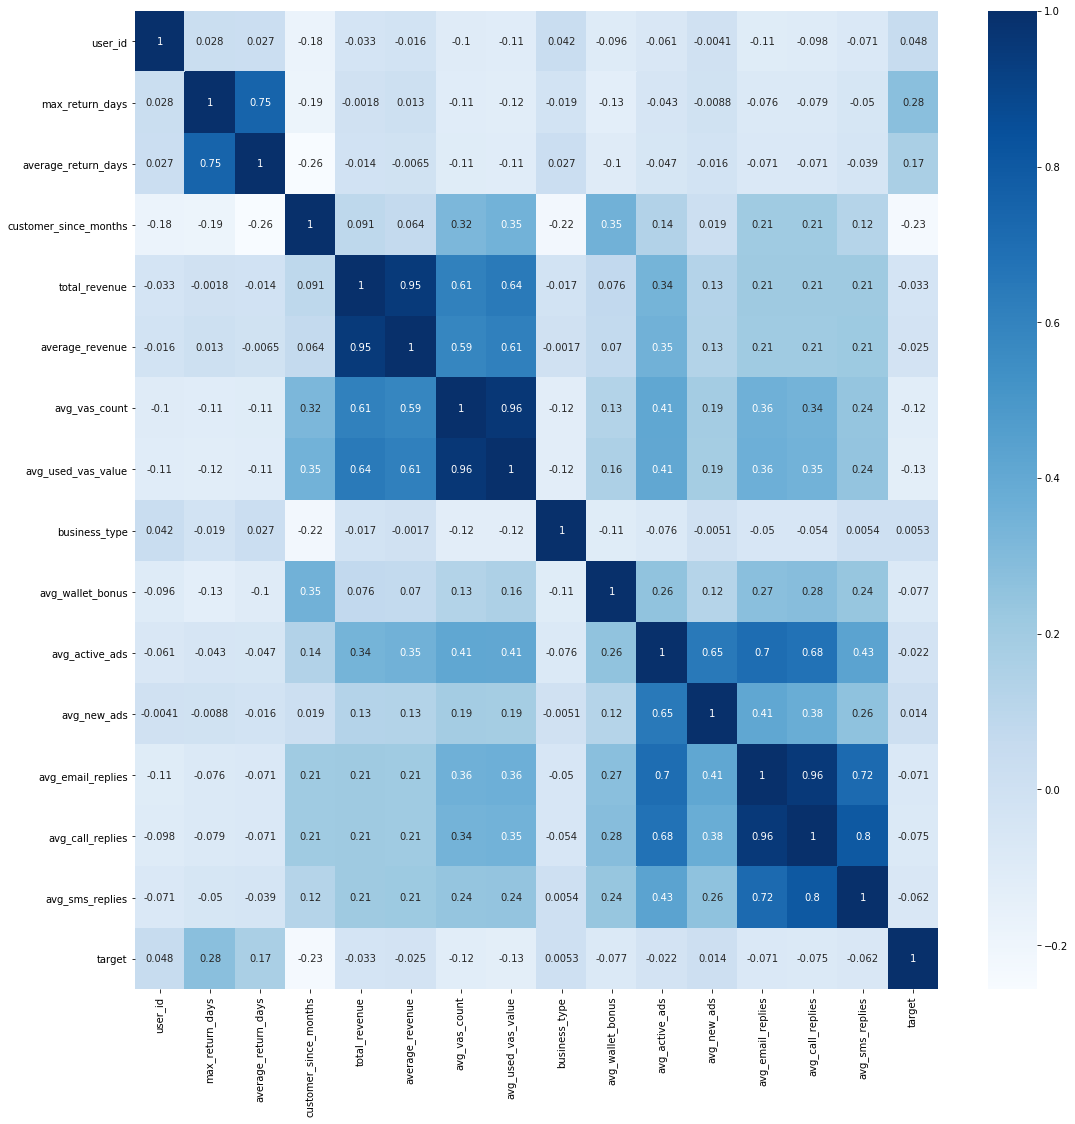

In [17]:
fig, ax = plt.subplots(figsize=(18,18))         
sns.heatmap(data_corr,annot=True,ax=ax,cmap="Blues")

* Dark shades represents positive correlation while lighter shades represents negative correlation. 
* set annot=True,to get values by which features are correlated to each other in grid-cells.
## Correlated features in general don't improve models, but they affect specific models, therefore its good to drop highly corelated feature

C:\Users\Code_love_r\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


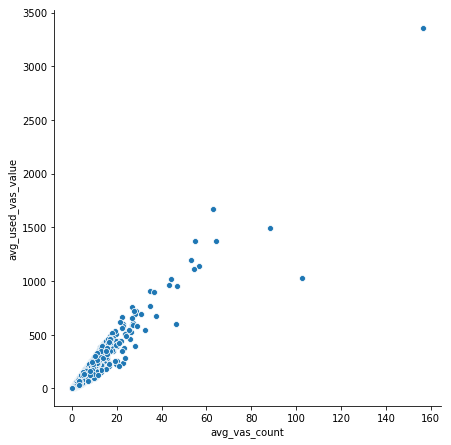

C:\Users\Code_love_r\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


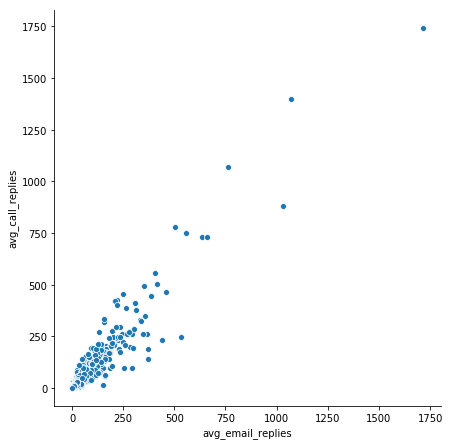

C:\Users\Code_love_r\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


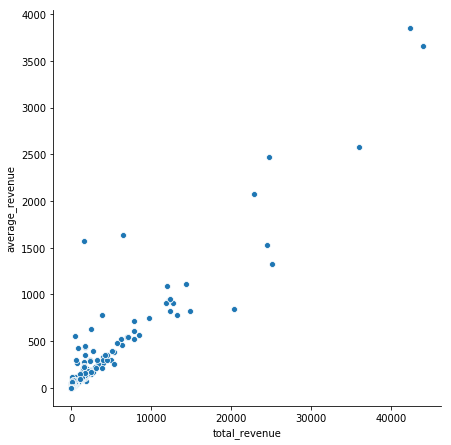

C:\Users\Code_love_r\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


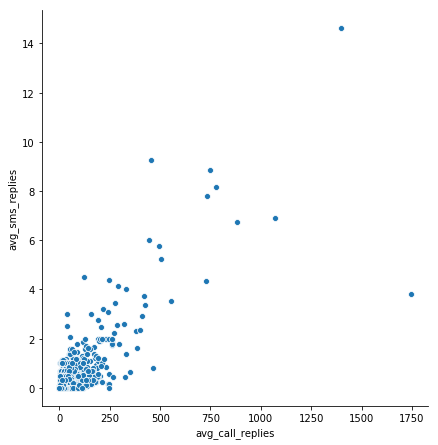

C:\Users\Code_love_r\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


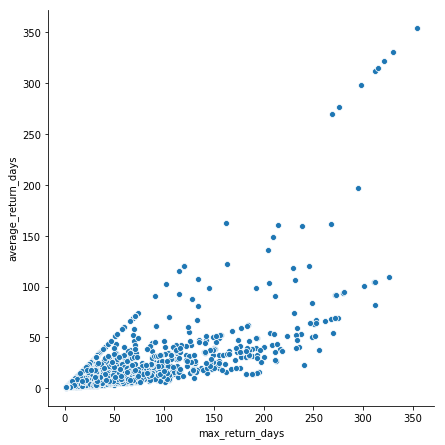

C:\Users\Code_love_r\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


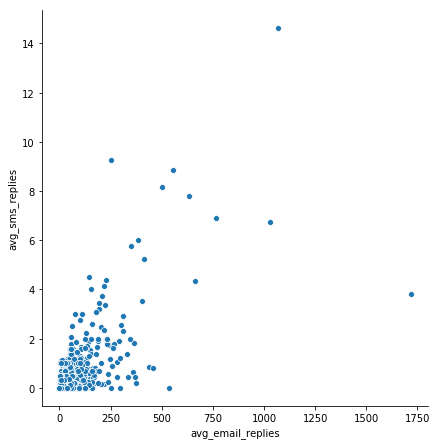

C:\Users\Code_love_r\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


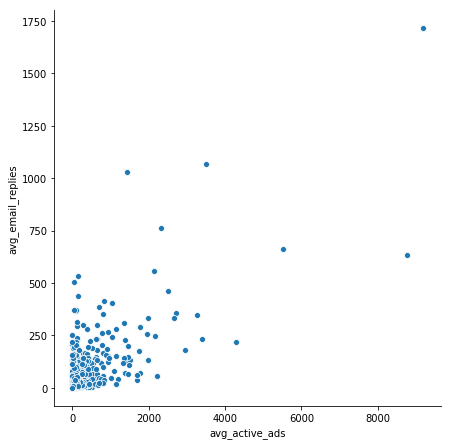

C:\Users\Code_love_r\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


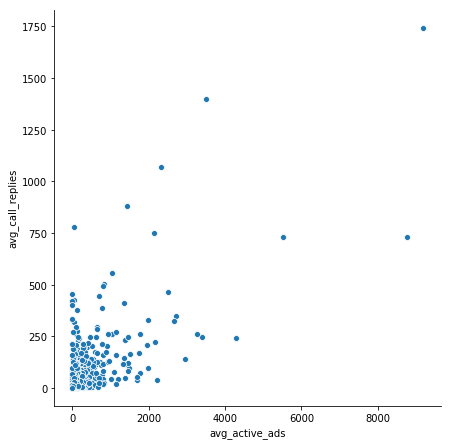

C:\Users\Code_love_r\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


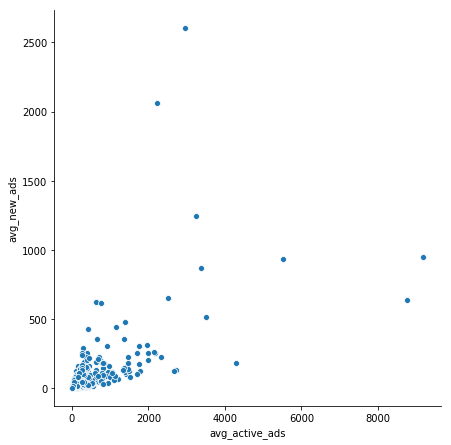

C:\Users\Code_love_r\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


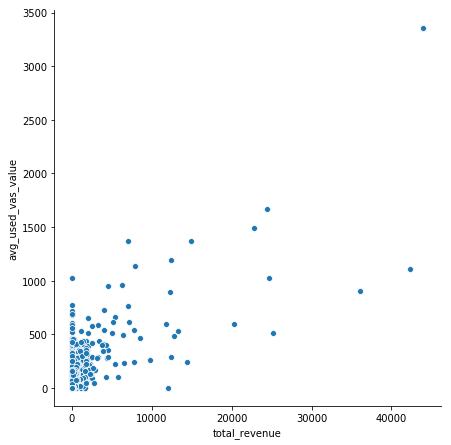

C:\Users\Code_love_r\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


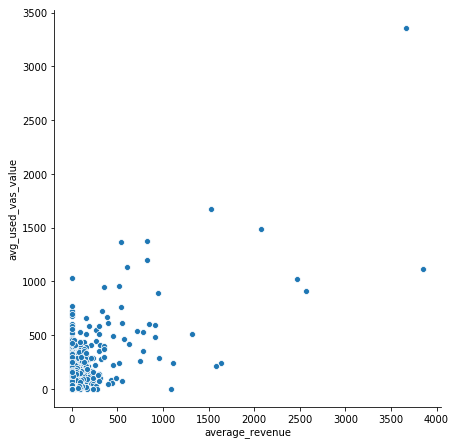

C:\Users\Code_love_r\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


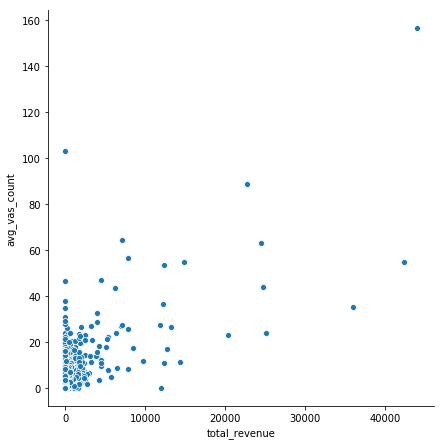

C:\Users\Code_love_r\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


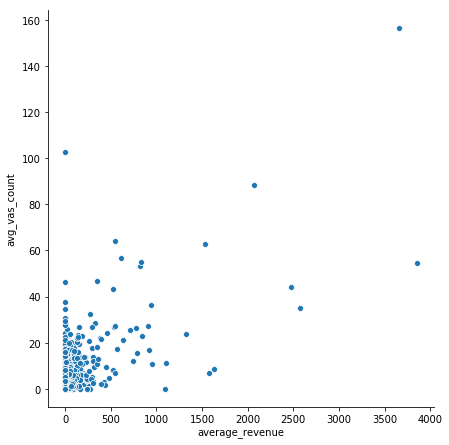

In [18]:
for v,i,j in s_corr_list:
    sns.pairplot(df, size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

In [19]:
df.drop('avg_used_vas_value',axis=1,inplace=True)
df.drop('avg_email_replies',axis=1,inplace=True)

In above first two scattered plot graphs of correlated pairs the point almost depict a linear straight line, which show both feature of pairs give same info so drop one feature of it. 

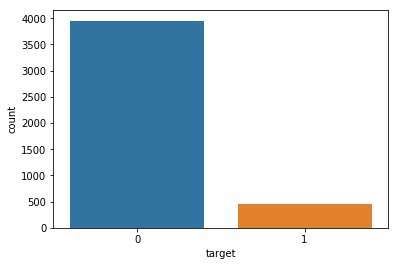

In [20]:
sns.countplot(x=df['target'],data = df) 

As you see in the above plot, training data contains most of the data of users belong to class 0, it shows the data is not balanced.

target,0,1
business_type,,
0,3118,364
1,434,24
2,20,29
3,183,16
4,49,5
5,148,17


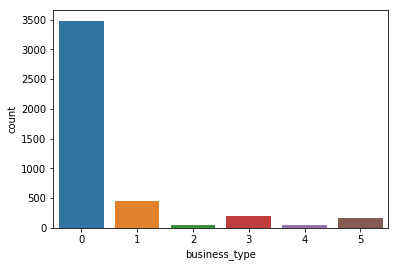

In [21]:
sns.countplot(x=df['business_type'],data = df) 
pd.crosstab(df['business_type'], df['target'])

Most number of  business_type is 0 type

In [22]:
X=df.iloc[:,:-1]
y=df['target']

You can normalize the data if you want, but here it does not affect so much on accuracy so i leave it.

In [23]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score
def evaluation_metrics():
    cm=confusion_matrix(y_test,y_pred)
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy:",accuracy_score(y_test,y_pred))

In [26]:
from sklearn.model_selection import cross_val_score
def K_Fold():
    accuracies_f=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
    print("Mean Accuracy:",accuracies_f.mean())
    print("Std:",accuracies_f.std())

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred=classifier.predict(X_test)

In [29]:
evaluation_metrics()

Confusion Matrix:
[[792   0]
 [ 90   0]]
Accuracy: 0.8979591836734694


In [30]:
K_Fold()

Mean Accuracy: 0.8964557043523051
Std: 0.0012715683749677797


# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(random_state=0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [32]:
evaluation_metrics()

Confusion Matrix:
[[733  59]
 [ 64  26]]
Accuracy: 0.8605442176870748


In [33]:
K_Fold()

Mean Accuracy: 0.8683588720061808
Std: 0.008585931349176875


# Shapely Additive Explanation (SHAP).
SHAP is a neural network used for interpretation of predictions made by complex machine learning models. It is a neural system which opens up about the black box which occurs in machine learning. In simple terms itcan be used to show how the features contribute to model to predict output.

In [34]:
import shap

Use Summary plot to show the impact of features of overall dataset

In [35]:
def calcshap(classifier, X_test):
    explainer = shap.TreeExplainer(classifier, X_test)
    shap_values = explainer.shap_values(X_test,check_additivity=False)
    shap.initjs()
    shap.summary_plot(shap_values, X_test)

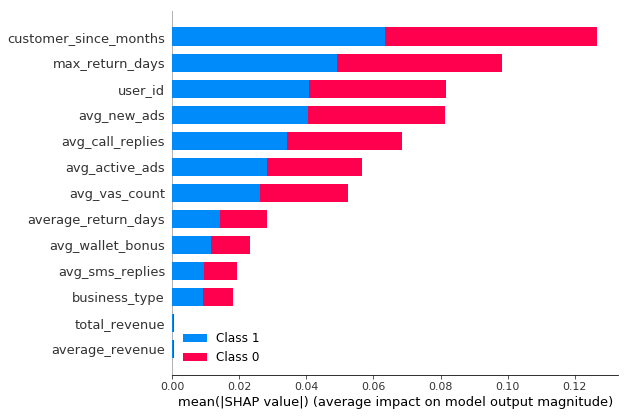

In [36]:
calcshap(classifier, X_test)

### As the above graph shows that each feature of the dataset equally contribute to classifier to predict the class as  0 or 1. 
customer_since_months is the most important and average_revenue is the least important feature in the dataset.


# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,random_state=42)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [38]:
evaluation_metrics()

Confusion Matrix:
[[776  16]
 [ 68  22]]
Accuracy: 0.9047619047619048


In [39]:
K_Fold()

Mean Accuracy: 0.9086547128508885
Std: 0.008371988874632539


100%|===================| 1763/1764 [01:04<00:00]        

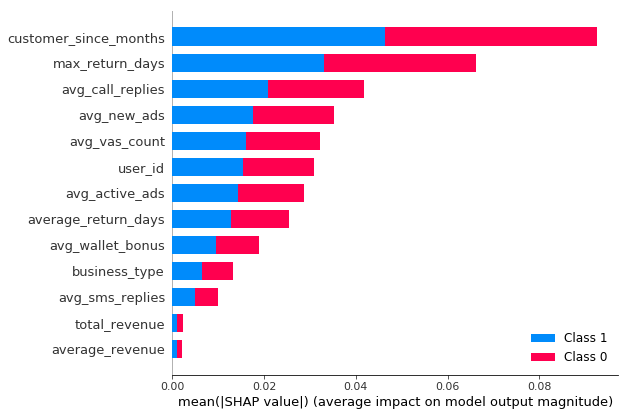

In [40]:
calcshap(classifier, X_test)

# XGBOOST

In [41]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [42]:
evaluation_metrics()

Confusion Matrix:
[[778  14]
 [ 66  24]]
Accuracy: 0.909297052154195


In [43]:
K_Fold()

Mean Accuracy: 0.9063819855781613
Std: 0.006849773018339124


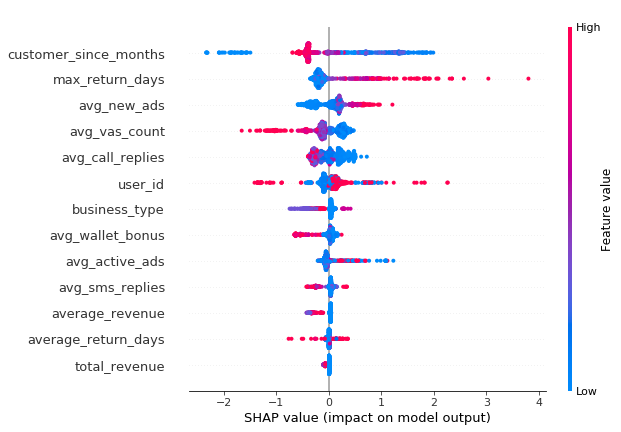

In [44]:
calcshap(classifier, X_test)

Higher max_return_days gives a positive impact on the model while higher avg_vas_count gives negative impact.
You can see customer_since_month is the most important feature in the dataset for the model prediction and the graph says the low value of it have a positive impact.